# Data Argumentation
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

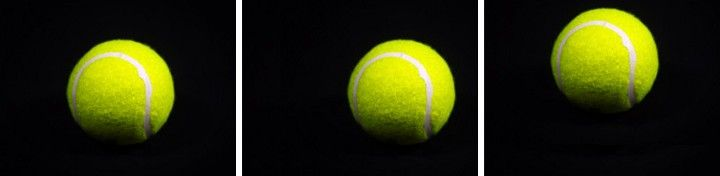



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.
*   Image change angle counterclockwise in degrees **shear_range**.   
*   Set the mean of each image to 0 **samplewise_center**


Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [3]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #python image library
from urllib.request import urlopen #Lets read an email address

First we upload an image from the internet

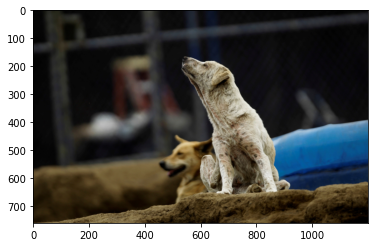

In [4]:
Url_dog = 'https://data1.ibtimes.co.in/en/full/627123/stray-dogs.jpg' 
filesave = urlopen(Url_dog)
picture = Image.open(filesave)
plt.imshow(picture)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


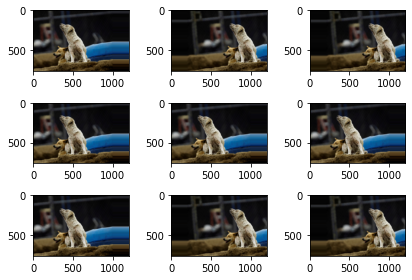

In [5]:
# We convert the image to an arrangement
Sec = img_to_array(picture)
# we expand to a sample
samples = expand_dims(Sec, 0)
# We create the data augmenter using only image change
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# we prepare the iterator
it = datagen.flow(samples, batch_size=1)
# we generate samples and display the results
for i in range(9):
	plt.subplot(330 + 1 + i)
# batches of images are generated
	batch = it.next()
	image = batch[0].astype('uint8') # is converted to a valid value to be able to display it as an image
	plt.imshow(image)
	plt.tight_layout()
plt.show()

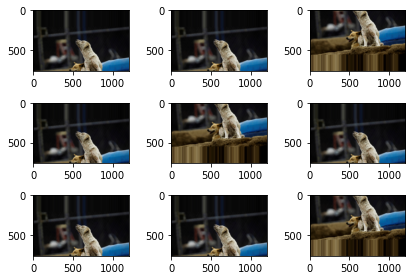

In [6]:
datagen = ImageDataGenerator( height_shift_range=[-200,200])
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8') 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to reverse the rows or columns of pixels in the case of a vertical or horizontal flip, respectively.
The magnification is specified by a Boolean argument ** horizontal_flip ** or ** vertical_flip ** for the ** ImageDataGenerator ** class.

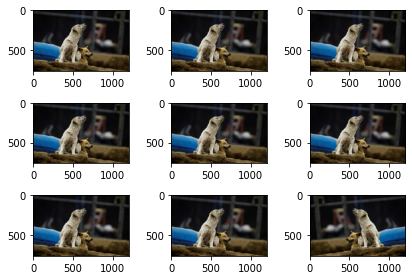

In [7]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

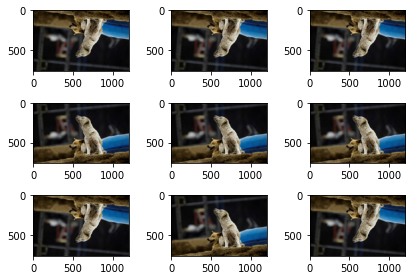

In [8]:
datagen = ImageDataGenerator(vertical_flip =True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower bound, upper bound] = [1-zoom_range, 1 + zoom_range]

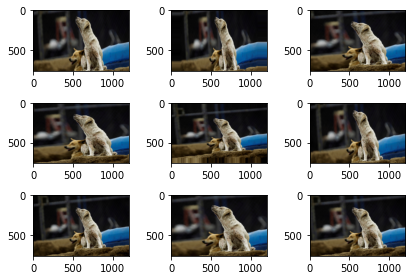

In [12]:
datagen = ImageDataGenerator(zoom_range=0.3) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

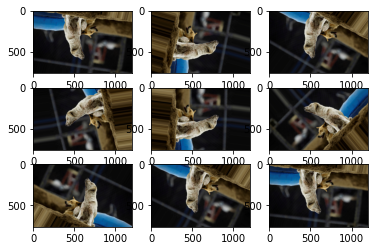

In [10]:
datagen = ImageDataGenerator(rotation_range=250)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Used to magnify images so computers can see how humans view things from different angles. 'Shear' means that the image will be distorted along one axis, primarily to create or rectify the angles of perception.

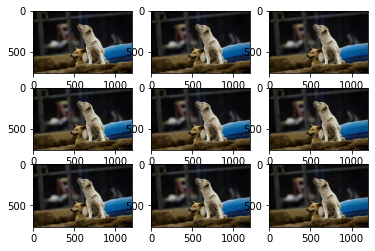

In [ ]:
datagen = ImageDataGenerator(shear_range=0.9,)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Points outside the boundaries of the input are filled according to the given mode: - 'constant': kkkkkkkk|abcd|kkkkkkkk (cval=k) - 'nearest': aaaaaaaa|abcd|dddddddd - 'reflect': abcddcba|abcd|dcbaabcd - 'wrap': abcdabcd|abcd|abcdabcd

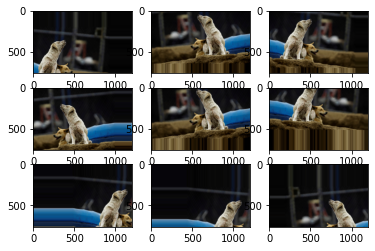

In [14]:
datagen = ImageDataGenerator (width_shift_range=0.4,height_shift_range=0.4,horizontal_flip=True,\
	fill_mode='nearest')  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the precision of the job.


* featurewise_center: Boolean, set the mean of each element to zero of all data.
* samplewise_center **: Boolean, set the mean of each sample to zero
* featurewise_std_normalization: Boolean, Divide the inputs by the standard deviation (std.) of the data set, based on the characteristics.
* samplewise_std_normalization: Boolean, divide each data by its std.
* zca_epsilon: The default is 1e-6.
* zca_whitening: Boolean, indicates if ZCA whitening is applied.  

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


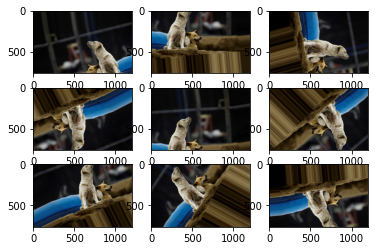

In [15]:
datagen = ImageDataGenerator(
            rotation_range               = 175,
            featurewise_std_normalization=True,
            samplewise_std_normalization=False,
            width_shift_range            = [150,150],   
            height_shift_range           = [200,200],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


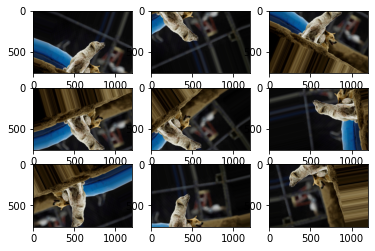

In [16]:
atagen = ImageDataGenerator (
        featurewise_center=False,   
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        rotation_range=30,   
        width_shift_range=0.6,  
        height_shift_range=0.6,   
        horizontal_flip=True,   
        vertical_flip=True,  
        zoom_range=False)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider the words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we risk that the meaning of the sentence changes completely.
There are some libraries that can help us to carry out this task, we will begin by analyzing the following:


1. Text attack
2. Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.

In [20]:
!pip install textattack

     |████████████████████████████████| 327kB 2.7MB/s 
     |████████████████████████████████| 778kB 8.5MB/s 
     |████████████████████████████████| 235kB 16.5MB/s 
     |████████████████████████████████| 102kB 7.3MB/s 
     |████████████████████████████████| 686kB 15.7MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 245kB 13.8MB/s 
     |████████████████████████████████| 317kB 16.4MB/s 
     |████████████████████████████████| 1.7MB 13.6MB/s 
     |████████████████████████████████| 153kB 37.1MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 1.1MB 33.0MB/s 
     |████████████████████████████████| 3.0MB 22.2MB/s 
     |████████████████████████████████| 204kB 42.9MB/s 
     |████████████████████████████████| 276kB 45.5MB/s 
     |████████████████████████████████| 19.7MB 9.2MB/s 
     |████████████████████████████████| 1.1MB 44.2MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
 

In [21]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


2020-10-16 23:13:50 INFO: Downloading default packages for language: en (English)...
2020-10-16 23:19:17 INFO: Finished downloading models and saved to /root/stanza_resources.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [22]:
text = "What was your favorite picture? "

TextAttack provides us with four methods for data augmentation.


## WordNetAugmenter
Augments the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is a lexical database for English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus in that it groups words based on their meaning.



In [23]:
aug = WordNetAugmenter();
aug.augment(text)

['What was your favorite see? ']


## EmbeddingAugmenter
 Augment text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.


In [24]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:35<00:00, 13.7MB/s]
textattack: Unzipping file /root/.cache/textattack/tmp3_3lx9f4.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['What was your favorite photographed? ']

## CharSwapAugmenter
Augment text by substituting, deleting, inserting, and swapping adjacent characters.

In [25]:
aug = CharSwapAugmenter()
aug.augment(text)

['What was your favorite Licture? ']


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


In [26]:
aug = EasyDataAugmenter()
aug.augment(text)

['What was your favorite follow picture? ',
 'What was your favorite characterization? ',
 'What was favorite your picture? ',
 'What was your picture? ']

Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the ** translate () ** method are:



1. ** src **: source language. this parameter is optional as ** googletrans ** will detect it.
2. ** dest **: target language. Mandatory parameter.

1. ** text **: the text to be translated from the source language to the target language. Mandatory parameter.





 



When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this back translation, there is a slight change in the sentence between the original text and the back-translated text, but the general meaning of the sentence is still preserved.

The supported languages ​​can be consulted at https://cloud.google.com/translate/docs/languages?hl=es

To obtain the best results, it is recommended to do some tests with the languages, if the target language is very similar, the translation does not lose information, however there may be the problem that the translation is too literal, this becomes a bit of a problem. try and failure.

Some examples of languages:


* Afrikaans 'af'

* Chinese (simplified) 'zh-CN or zh'

* Esperanto 'eo'

* Japanese 'ha'
* Latin 'la'


* Spanish people'


* Turkmen 'tk'


* Yiddish 'yi'

* Zulu 'zu'



In [27]:
!pip install googletrans

     |████████████████████████████████| 61kB 2.2MB/s 
     |████████████████████████████████| 51kB 2.6MB/s 
     |████████████████████████████████| 972kB 4.5MB/s 
     |████████████████████████████████| 71kB 3.7MB/s 
     |████████████████████████████████| 61kB 4.3MB/s 
     |████████████████████████████████| 102kB 4.5MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=3230108767a9c9b2fd71aedb6985f4c83ed89f8f98e16d78c911fedc66000855
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=7f0fad23d93c4a7842378c15a56bae3f61826cbe6211c961b06cda86650729e5
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [28]:
from googletrans import Translator
translator = Translator()

In [30]:
origin_text = "If you are unsuccessful at first, try again until you succeed."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If you are unsuccessful at first, try again until you succeed.
Uma ungaphumelelanga ekuqaleni, zama futhi uze uphumelele.
If you did not succeed at first, try again.


In [31]:
origin_text = "If you are unsuccessful at first, try again until you succeed."
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If you are unsuccessful at first, try again until you succeed.
最初は失敗した場合は、成功するまで再試行してください。
If it fails initially, try again until it succeeds.


In [32]:
origin_text = "If you are unsuccessful at first, try again until you succeed."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
Uma ekuqaleni ungaphumeleli, zama, uzame futhi.
If at first you fail, try again.


In [39]:
origin_text = "If you are unsuccessful at first, try again until you succeed."
text_trans = translator.translate(text=origin_text, dest='la').text
text_trans2 = translator.translate(text=origin_text, dest='zu').text
text_trans3 = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print("\nIf you also speak other languages, look at the following:")
print("\nlatin:", text_trans)
print("\nZulu:", text_trans2)
print("\nJapanese:", text_trans3)
print()
print(final)

If you are unsuccessful at first, try again until you succeed.

If you also speak other languages, look at the following:

latin: Si prospere prima donec succedat experimentum.

Zulu: Uma ungaphumelelanga ekuqaleni, zama futhi uze uphumelele.

Japanese: 最初は失敗した場合は、成功するまで再試行してください。

If successful, the experiment until it succeeds.
